## 安装pytorch

In [1]:
# 导入魔法命令
%run helper.py

# 内联图片
%matplotlib inline

In [28]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [29]:
import torch
from torch import autograd
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [4]:
# 打印版本号
print(torch.__version__)

2.6.0+cpu


## 基本使用方法

> PyTorch 是一个开源的深度学习框架，以其灵活性和动态计算图而广受欢迎
> PyTorch 主要有以下几个基础概念：张量（Tensor）、自动求导（Autograd）、神经网络模块（nn.Module）、优化器（optim）等。

+ 张量（Tensor）：PyTorch 的核心数据结构，支持多维数组，并可以在 CPU 或 GPU 上进行加速计算。
+ 自动求导（Autograd）：PyTorch 提供了自动求导功能，可以轻松计算模型的梯度，便于进行反向传播和优化。
+ 神经网络（nn.Module）：PyTorch 提供了简单且强大的 API 来构建神经网络模型，可以方便地进行前向传播和模型定义。
+ 优化器（Optimizers）：使用优化器（如 Adam、SGD 等）来更新模型的参数，使得损失最小化。
+ 设备（Device）：可以将模型和张量移动到 GPU 上以加速计算。


In [5]:
# 创建一个矩阵
x = torch.empty(5, 3)
print(x)

tensor([[-3.0576e-02,  3.5610e-41,  0.0000e+00],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 7.3470e+28,  6.1425e+28,  7.1441e+31],
        [ 6.9987e+22,  7.8675e+34,  4.7418e+30],
        [ 5.9663e-02,  7.0374e+22,  0.0000e+00]])


In [6]:
# 自动微分
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad = True)
b = torch.tensor(1., requires_grad = True)
c = torch.tensor(1., requires_grad = True)

y = a**3 * x + b * x + c

print(a.grad, b.grad, c.grad)
grads = autograd.grad(y, [a, b ,c])
print(grads[0], grads[1], grads[2])

None None None
tensor(3.) tensor(1.) tensor(1.)


### 张量(Tensors)

#### 声明和定义

首先是对 Tensors 的声明和定义方法，分别有以下几种:


In [7]:
# 创建一个 5*3 的矩阵
x = torch.empty(5, 3)
print(x)
print(type(x))

tensor([[-3.0907e-02,  3.5610e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
<class 'torch.Tensor'>


In [8]:
# 创建一个随机初始化的 5*3 矩阵
rand_x = torch.rand(5, 3)
print(rand_x)

tensor([[0.1914, 0.0925, 0.1922],
        [0.6038, 0.8227, 0.3138],
        [0.5482, 0.0842, 0.3302],
        [0.0198, 0.2078, 0.0039],
        [0.5381, 0.8926, 0.2559]])


In [9]:
# 创建一个数值皆是 0，类型为 long 的矩阵
zero_x = torch.zeros(5, 3, dtype=torch.long)
print(zero_x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [10]:
# tensor 数值是 [5.5, 3]
tensor1 = torch.tensor([5.5, 3])
print(tensor1)

tensor([5.5000, 3.0000])


#### 张量计算

+ 运算符
    - torch.add(tensor1, tensor2, [out=tensor3])
    - tensor1.add_(tensor2)：直接修改 tensor 变量

In [11]:
# 显示定义新的尺寸是 5*3，数值类型是 torch.double
tensor2 = tensor1.new_ones(5, 3, dtype=torch.double)  # new_* 方法需要输入 tensor 大小
print(tensor2)
tensor3 = torch.randn_like(tensor2, dtype=torch.float)
print('tensor3: ', tensor3)
tensor4 = torch.rand(5, 3)
print('tensor3 + tensor4= ', tensor3 + tensor4)
print('tensor3 + tensor4= ', torch.add(tensor3, tensor4))
# 新声明一个 tensor 变量保存加法操作的结果
result = torch.empty(5, 3)
torch.add(tensor3, tensor4, out=result)
print('add result= ', result)
# 直接修改变量
tensor3.add_(tensor4)
print('tensor3= ', tensor3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor3:  tensor([[ 0.2606,  1.4606,  0.7523],
        [-0.4047, -0.4868,  0.9053],
        [-0.6099,  0.3712, -0.1146],
        [-2.0551, -0.6769, -0.0668],
        [ 0.9923,  1.2954,  1.5758]])
tensor3 + tensor4=  tensor([[ 0.3639,  2.3958,  1.7394],
        [ 0.0338,  0.1430,  1.0662],
        [-0.5789,  0.7439,  0.3459],
        [-1.6015, -0.0655,  0.1502],
        [ 1.1423,  1.9105,  1.5982]])
tensor3 + tensor4=  tensor([[ 0.3639,  2.3958,  1.7394],
        [ 0.0338,  0.1430,  1.0662],
        [-0.5789,  0.7439,  0.3459],
        [-1.6015, -0.0655,  0.1502],
        [ 1.1423,  1.9105,  1.5982]])
add result=  tensor([[ 0.3639,  2.3958,  1.7394],
        [ 0.0338,  0.1430,  1.0662],
        [-0.5789,  0.7439,  0.3459],
        [-1.6015, -0.0655,  0.1502],
        [ 1.1423,  1.9105,  1.5982]])
tensor3=  tensor([[ 0.3639,  2.3958,  1.7394],
        [ 0.03

#### 和 Numpy 数组的转换
Tensor 和 Numpy 的数组可以相互转换，并且两者转换后共享在 CPU 下的内存空间，即改变其中一个的数值，另一个变量也会随之改变。

In [12]:
# numpy转torch 
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

# torch转numpy

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### 自动求导(autograd)

对于 Pytorch 的神经网络来说，非常关键的一个库就是 autograd ，它主要是提供了对 Tensors 上所有运算操作的自动微分功能，也就是计算梯度的功能。它属于 define-by-run 类型框架，即反向传播操作的定义是根据代码的运行方式，因此每次迭代都可以是不同的。


In [13]:
# 定义
x = torch.ones(2, 2, requires_grad=True)
print(x)

# 执行计算
y = x + 2
print(y)

# 打印梯度
print(y.grad_fn)

# 继续计算
z = y * y * 3
out = z.mean()

print('z=', z)
print('out=', out)

# 计算梯度
# 接下来就是开始计算梯度，进行反向传播的操作

out.backward()
# 输出梯度 d(out)/dx
print(x.grad)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
z= tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
out= tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## 神经网络

+ 定义一个多层的神经网络
+ 对数据集的预处理并准备作为网络的输入
+ 将数据输入到网络
+ 计算网络的损失
+ 反向传播，计算梯度
+ 更新网络的梯度，一个简单的更新规则是 weight = weight - learning_rate * gradient


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像是单通道，conv1 kenrnel size=5*5，输出通道 6
        self.conv1 = nn.Conv2d(1, 6, 5)
        # conv2 kernel size=5*5, 输出通道 16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # max-pooling 采用一个 (2,2) 的滑动窗口
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 核(kernel)大小是方形的话，可仅定义一个数字，如 (2,2) 用 2 即可
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        # 除了 batch 维度外的所有维度
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
# 这里必须实现 forward 函数，而 backward 函数在采用 autograd 时就自动定义好了，
# 在 forward 方法可以采用任何的张量操作。

params = list(net.parameters())
print('参数数量: ', len(params))
# conv1.weight
print('第一个参数大小: ', params[0].size())

参数数量:  10
第一个参数大小:  torch.Size([6, 1, 5, 5])


In [16]:
# 输入一个随机数据
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0502,  0.0476, -0.0857, -0.0522, -0.1765, -0.0310,  0.0778, -0.0274,
         -0.0216, -0.0207]], grad_fn=<AddmmBackward0>)


In [17]:
# 清空所有参数的梯度缓存，然后计算随机梯度进行反向传播
net.zero_grad()
out.backward(torch.randn(1, 10))

### 损失函数

损失函数的输入是 (output, target) ，即网络输出和真实标签对的数据，然后返回一个数值表示网络输出和真实标签的差距。

PyTorch 中其实已经定义了不少的损失函数，这里仅采用简单的均方误差：nn.MSELoss ，例子如下：

In [18]:
output = net(input)
# 定义伪标签
target = torch.randn(10)
# 调整大小，使得和 output 一样的 size
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5801, grad_fn=<MseLossBackward0>)


In [19]:
# MSELoss
print(loss.grad_fn)
# Linear layer
print(loss.grad_fn.next_functions[0][0])
# Relu
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [20]:
# 清空所有参数的梯度缓存
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 1.2978e-02, -2.6963e-03,  1.0054e-02, -2.2406e-03, -7.0706e-05,
        -1.2334e-02])


In [21]:
# 简单实现权重的更新例子
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [22]:
import torch.optim as optim
# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中执行下列操作
optimizer.zero_grad() # 清空梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
# 更新权重
optimizer.step()

### 神经元

In [30]:
# 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义一个输入层到隐藏层的全连接层
        self.fc1 = nn.Linear(2, 2)  # 输入 2 个特征，输出 2 个特征
        # 定义一个隐藏层到输出层的全连接层
        self.fc2 = nn.Linear(2, 1)  # 输入 2 个特征，输出 1 个预测值
   
    def forward(self, x):
        # 前向传播过程
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.fc2(x)  # 输出层
        return x

# 创建模型实例
model = SimpleNN()

# 打印模型
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


Epoch [1/50], Loss: 0.3075
Epoch [2/50], Loss: 0.3071
Epoch [3/50], Loss: 0.3067
Epoch [4/50], Loss: 0.3063
Epoch [5/50], Loss: 0.3060
Epoch [6/50], Loss: 0.3056
Epoch [7/50], Loss: 0.3052
Epoch [8/50], Loss: 0.3049
Epoch [9/50], Loss: 0.3045
Epoch [10/50], Loss: 0.3041
Epoch [11/50], Loss: 0.3038
Epoch [12/50], Loss: 0.3034
Epoch [13/50], Loss: 0.3030
Epoch [14/50], Loss: 0.3027
Epoch [15/50], Loss: 0.3023
Epoch [16/50], Loss: 0.3020
Epoch [17/50], Loss: 0.3016
Epoch [18/50], Loss: 0.3012
Epoch [19/50], Loss: 0.3009
Epoch [20/50], Loss: 0.3005
Epoch [21/50], Loss: 0.3002
Epoch [22/50], Loss: 0.2999
Epoch [23/50], Loss: 0.2995
Epoch [24/50], Loss: 0.2992
Epoch [25/50], Loss: 0.2989
Epoch [26/50], Loss: 0.2986
Epoch [27/50], Loss: 0.2982
Epoch [28/50], Loss: 0.2979
Epoch [29/50], Loss: 0.2976
Epoch [30/50], Loss: 0.2973
Epoch [31/50], Loss: 0.2969
Epoch [32/50], Loss: 0.2966
Epoch [33/50], Loss: 0.2963
Epoch [34/50], Loss: 0.2960
Epoch [35/50], Loss: 0.2956
Epoch [36/50], Loss: 0.2953
E

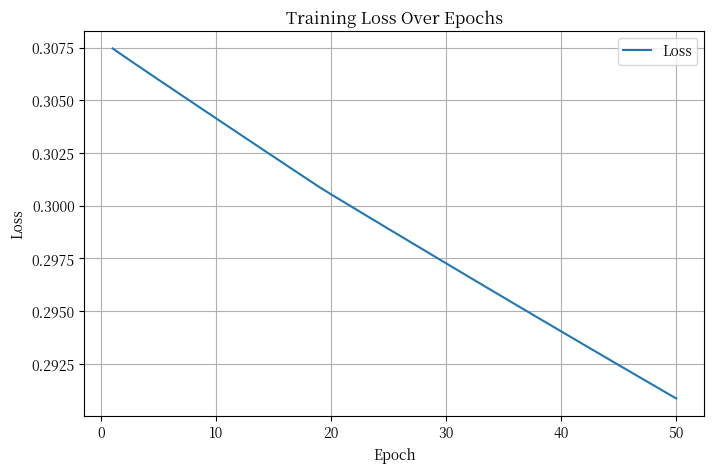

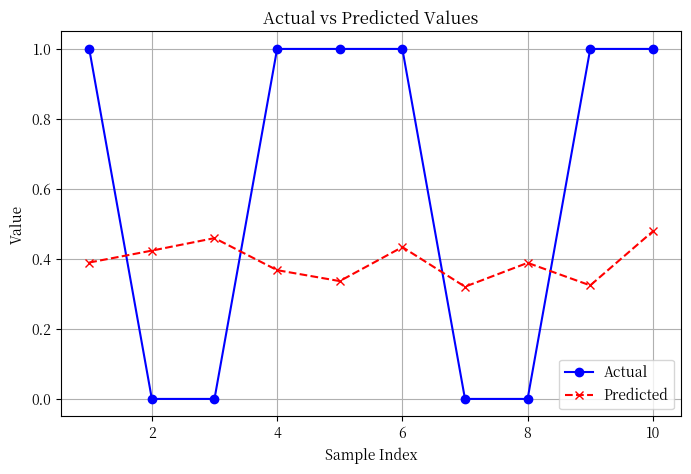

In [31]:
# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0],
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

#### 数据准备

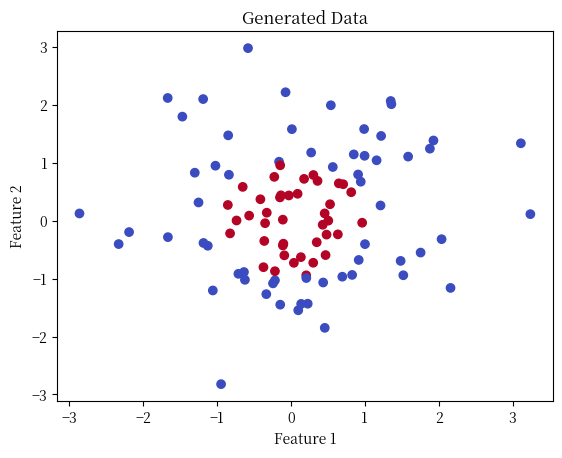

In [32]:
# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### 定义神经网络

In [34]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

# 实例化模型
model = SimpleNN()

#### 定义损失函数与优化器

In [35]:
# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

#### 训练模型

In [36]:
# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6850
Epoch [20/100], Loss: 0.6570
Epoch [30/100], Loss: 0.6389
Epoch [40/100], Loss: 0.6267
Epoch [50/100], Loss: 0.6177
Epoch [60/100], Loss: 0.6104
Epoch [70/100], Loss: 0.6038
Epoch [80/100], Loss: 0.5974
Epoch [90/100], Loss: 0.5910
Epoch [100/100], Loss: 0.5844


##  训练分类器

+ 训练流程如下：
    - 通过调用 torchvision 加载和归一化 CIFAR10 训练集和测试集；
    - 构建一个卷积神经网络；
    - 定义一个损失函数；
    - 在训练集上训练网络；
    - 在测试集上测试网络性能

In [23]:
# 将图片数据从 [0,1] 归一化为 [-1, 1] 的取值范围
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

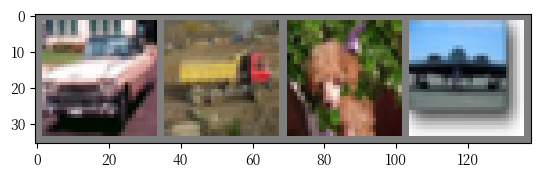

  car truck   dog plane


In [24]:
# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练集图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 定义损失函数和优化器

In [26]:
# 这里采用类别交叉熵函数和带有动量的 SGD 优化方法：

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 训练网络

> 第四步自然就是开始训练网络，指定需要迭代的 epoch，然后输入数据</br>
> 指定次数打印当前网络的信息，比如 loss 或者准确率等性能评价标准。

In [ ]:
import time
start = time.time()
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time()-start)

In [ ]:
# 测试
dataiter = iter(testloader)
images, labels = next(dataiter)

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# 网络输出
outputs = net(images)

# 预测结果
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

## 数据并行